#### Notebook Summary

02 contains modelling and final results

## Index
- [Count Vectorizer](#Count-Vectorizer)
- [Model Performance Function](#Model-Performance-Function)
- [Modelling](#Modelling)
- [N-Gram Features](#N-Gram-Features)
- [Modelling with TFIDF Transformation](#Modelling-with-TFIDF-Transformation)
- [Model Examination](#Model-Examination)
- [Conclusion](#Conclusion)


In [1]:
# imports

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\sdm\system\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\sdm\system\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_1 = pd.read_csv('./Data/data1.csv')
df_2 = pd.read_csv('./Data/data2.csv')
df_1.drop('Unnamed: 0', axis=1, inplace=True)
df_2.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_1.head()

,Comment
0,"every december, the admins give reddit moderat..."
1,**greetings!**\r\n\*^(\*rules and conditions m...
2,to establish a branch office!
3,"this is not a new idea, but it has become espe..."
4,"a lot of perks and what not have things ""we"" a..."


In [4]:
df_1['Type'] = 'Stellaris'

In [5]:
df_2['Type'] = 'DwarfFort'

In [6]:
df = df_1.append(df_2)

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.tail()

,Comment,Type
1082,"i really like watching df streams, so if you k...",DwarfFort
1083,i have been a fan of df now for around 5-6 yea...,DwarfFort
1084,hey dwarfs!\r\n\r\ni'm the guy who started a f...,DwarfFort
1085,i sent my dwarves to go pillage some elf villa...,DwarfFort
1086,"(entirely default df, with only a few changes ...",DwarfFort


## Count Vectorizer

Count vectorizer will be used to convert our Reddit comments into matrices of frequency counts per words in each comment.

In [9]:
X = df['Comment']
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
count_vect = CountVectorizer(max_features=10000, 
                             stop_words='english')
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

In [11]:
X_train_counts.shape

(815, 10000)

In [12]:
X_test_counts.shape

(272, 10000)

In [13]:
y_train.shape

(815,)

In [14]:
y_test.shape

(272,)

In [15]:
# displaying word counts for specific comments in the combined train dataset

text = pd.DataFrame(X_train_counts.toarray(), columns = count_vect.get_feature_names())
text.iloc[0].sort_values(0, ascending=False).head(10)

build          1
try            1
expansion      0
expecting      0
expected       0
expectation    0
expect         0
expansive      0
expansions     0
expands        0
Name: 0, dtype: int64

In [16]:
# displaying word count sums for all comments in the combined train dataset

sum_words = X_train_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('amp', 568),
 ('game', 533),
 ('just', 474),
 ('x200b', 463),
 ('like', 409),
 ('new', 357),
 ('empire', 351),
 ('https', 306),
 ('planets', 258),
 ('pops', 256),
 ('ve', 255),
 ('time', 250),
 ('planet', 228),
 ('make', 226),
 ('fortress', 224),
 ('com', 208),
 ('don', 204),
 ('know', 197),
 ('empires', 186),
 ('jobs', 181)]

In [17]:
# displaying most common words in the df_1 set (Stellaris)

count_vect_df1 = CountVectorizer(max_features=10000, 
                             stop_words='english')
df1_cv = count_vect_df1.fit_transform(df_1['Comment'])
sum_words = df1_cv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect_df1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('game', 534),
 ('empire', 436),
 ('just', 401),
 ('amp', 387),
 ('like', 375),
 ('x200b', 370),
 ('planets', 325),
 ('pops', 319),
 ('planet', 303),
 ('new', 263),
 ('ve', 227),
 ('empires', 220),
 ('jobs', 202),
 ('don', 199),
 ('energy', 193),
 ('make', 192),
 ('time', 181),
 ('war', 180),
 ('species', 171),
 ('trade', 171)]

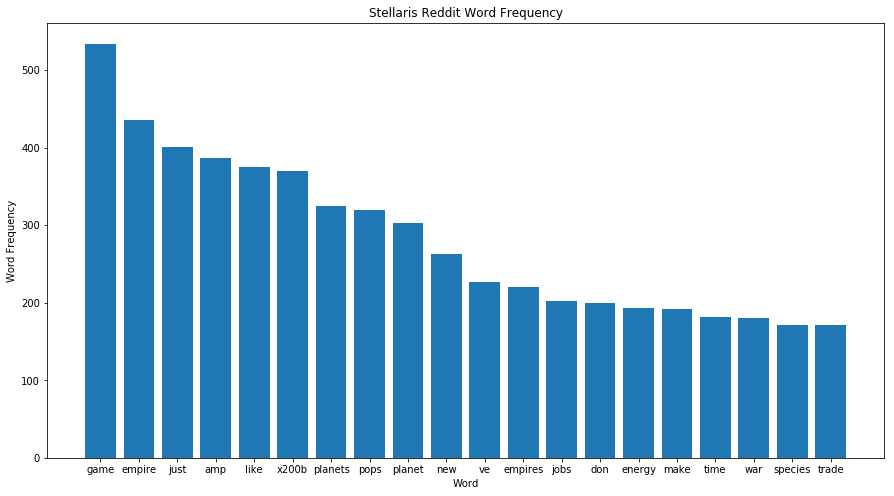

In [18]:
word = list(zip(*words_freq[:20]))[0]
freq = list(zip(*words_freq[:20]))[1]
x_pos = np.arange(len(words_freq[:20])) 

plt.figure(figsize=(15,8))
plt.bar(x_pos, freq, align='center')
plt.xticks(x_pos, word) 
plt.title('Stellaris Reddit Word Frequency')
plt.ylabel('Word Frequency')
plt.xlabel('Word')
plt.show()

In [19]:
# displaying most common words in the df_2 set (Dwarf Fortress)

count_vect_df2 = CountVectorizer(max_features=10000, 
                             stop_words='english')
df2_cv = count_vect_df1.fit_transform(df_2['Comment'])
sum_words = df2_cv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect_df1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('amp', 315),
 ('https', 265),
 ('fortress', 260),
 ('just', 207),
 ('x200b', 205),
 ('dwarf', 185),
 ('game', 183),
 ('new', 177),
 ('com', 164),
 ('like', 152),
 ('dwarves', 149),
 ('time', 135),
 ('know', 117),
 ('df', 114),
 ('www', 110),
 ('search', 101),
 ('world', 101),
 ('png', 99),
 ('ve', 94),
 ('make', 94)]

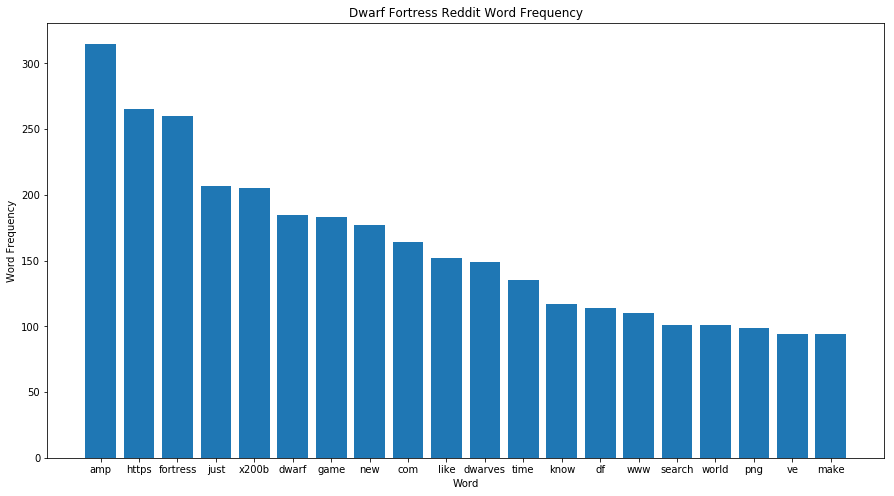

In [20]:
word = list(zip(*words_freq[:20]))[0]
freq = list(zip(*words_freq[:20]))[1]
x_pos = np.arange(len(words_freq[:20])) 

plt.figure(figsize=(15,8))
plt.bar(x_pos, freq, align='center')
plt.xticks(x_pos, word) 
plt.title('Dwarf Fortress Reddit Word Frequency')
plt.ylabel('Word Frequency')
plt.xlabel('Word')
plt.show()

## Model Performance Function

A function below will be defined, which will output a selection of standard model evaluation metrics.

In [21]:
def performance(model, X_train_p, X_test_p):
    y_pred = model.fit(X_train_p, y_train).predict(X_test_p)
    y_true = y_test
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('Accuracy Score train:')
    print(model.score(X_train_p, y_train))
    print('Accuracy Score test:')
    print(model.score(X_test_p, y_test))
    
    # Compute confusion matrix
    plt.figure()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cm = cnf_matrix
    np.set_printoptions(precision=2)
    classes=set(y)
    normalize=True
    cmap=plt.cm.Blues
    
    # create plots
    title='Confusion matrix'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot nnormalized confusion matrix
    plt.figure();
    
    title='Normalized confusion matrix'
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot nnormalized confusion matrix
    plt.figure();
    
    plt.show();

## Modelling

Two models will be tested (no hyperparameter tuning), performance on the train/test split will be reviewed.  A short manual docstring will be tested first on each model to see if they can correctly predict a customized comment in the correct Reddit category.

### Docstring Tester

In [22]:
# creating two test phrases to enter into each model
docs_new = ['Spaceship alien laser planet federation research interceptor xenophile', 
            'Ettin sword dwarf blacksmith goblin siege crossbow bay12 megabeast dig']

X_new_counts = count_vect.transform(docs_new)

In [23]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=5)
rf.fit(X=X_train_counts, y=y_train)

predicted = rf.predict(X_new_counts)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Spaceship alien laser planet federation research interceptor xenophile' => Stellaris
'Ettin sword dwarf blacksmith goblin siege crossbow bay12 megabeast dig' => Stellaris


In [24]:
sgd = SGDClassifier()
sgd.fit(X_train_counts, y_train)

predicted = sgd.predict(X_new_counts)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'Spaceship alien laser planet federation research interceptor xenophile' => Stellaris
'Ettin sword dwarf blacksmith goblin siege crossbow bay12 megabeast dig' => DwarfFort


### Model Performance Testing

#### Random Forest Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       1.00      0.17      0.29        82
  Stellaris       0.74      1.00      0.85       190

avg / total       0.82      0.75      0.68       272

Accuracy Score train:
0.7766871165644171
Accuracy Score test:
0.75


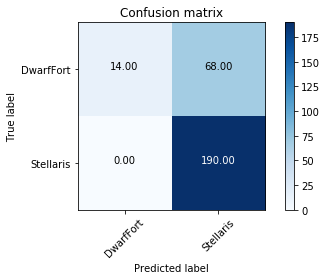

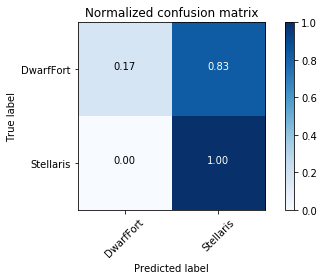

<Figure size 432x288 with 0 Axes>

In [25]:
# instance model
model = RandomForestClassifier(n_estimators=1000, max_depth=5)
# fit model
model.fit(X=X_train_counts, y=y_train)

performance(model, X_train_counts, X_test_counts)

#### SGD Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       0.90      0.88      0.89        82
  Stellaris       0.95      0.96      0.95       190

avg / total       0.93      0.93      0.93       272

Accuracy Score train:
0.992638036809816
Accuracy Score test:
0.9338235294117647


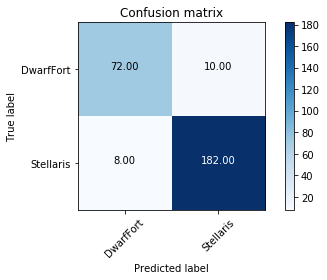

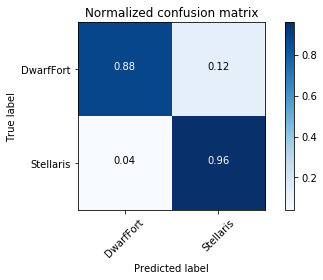

<Figure size 432x288 with 0 Axes>

In [26]:
# instance model
model = SGDClassifier()
# fit model
model.fit(X=X_train_counts, y=y_train)

performance(model, X_train_counts, X_test_counts)

## N-Gram Features

Potentially we may be losing important context of the sentances when we're reviewing each word as if they were independent of each other.  N-gram features will be tested to see if we gain any additional accuracy but breaking up words into dependent groups.

In [27]:
count_vect = CountVectorizer(max_features=10000,
                             stop_words='english',
                            ngram_range=(2,4))
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

In [28]:
text = pd.DataFrame(X_train_counts.toarray(), columns=count_vect.get_feature_names())
text.tail(5)

,000cm³ probably,000cm³ probably fine,000cm³ probably fine training,01 https,01 https imgur,01 https imgur com,02 https,02 https imgur,02 https imgur com,03 https,...,youtube user,youtube user page,youtube user page thanks,youtuber lolz,yup moody,yup moody dorfs,yup moody dorfs build,zombies later,zombies later horned,zombies later horned web
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Random Forest Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       1.00      0.13      0.24        82
  Stellaris       0.73      1.00      0.84       190

avg / total       0.81      0.74      0.66       272

Accuracy Score train:
0.7263803680981595
Accuracy Score test:
0.7389705882352942


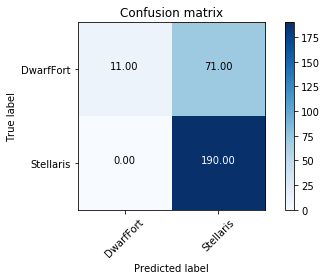

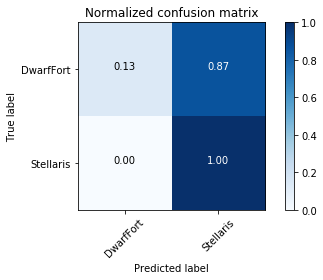

<Figure size 432x288 with 0 Axes>

In [29]:
# instance model
model = RandomForestClassifier(n_estimators=1000, max_depth=5)
# fit model
model.fit(X=X_train_counts, y=y_train)

performance(model, X_train_counts, X_test_counts)

#### SGD Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       0.74      0.62      0.68        82
  Stellaris       0.85      0.91      0.88       190

avg / total       0.81      0.82      0.82       272

Accuracy Score train:
0.9607361963190184
Accuracy Score test:
0.8198529411764706


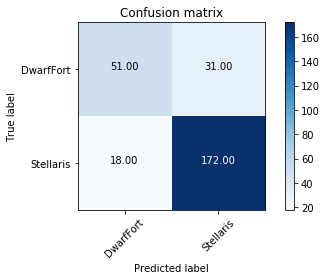

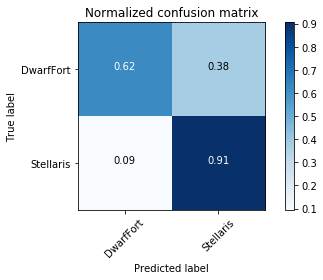

<Figure size 432x288 with 0 Axes>

In [30]:
# instance model
model = SGDClassifier()
# fit model
model.fit(X=X_train_counts, y=y_train)

performance(model, X_train_counts, X_test_counts)

## Modelling with TFIDF Transformation

Using n-gram features caused decreased our model performance, so the context of individual words likely is not important compared to simply what words are used.  Next we will test model accuracy using TFIDF transformation, to convert our count matrices to discount words that are used more commonly.

In [31]:
count_vect = TfidfVectorizer(max_features=10000,
                             stop_words='english')
X_train_tf = count_vect.fit_transform(X_train)
X_test_tf = count_vect.transform(X_test)

#### Random Forest Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       1.00      0.15      0.26        82
  Stellaris       0.73      1.00      0.84       190

avg / total       0.81      0.74      0.67       272

Accuracy Score train:
0.7644171779141105
Accuracy Score test:
0.7426470588235294


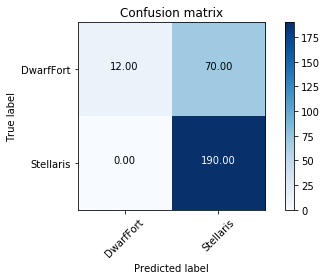

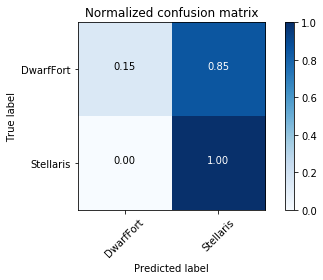

<Figure size 432x288 with 0 Axes>

In [32]:
# instance model
model = RandomForestClassifier(n_estimators=1000, max_depth=5)
# fit model
model.fit(X=X_train_tf, y=y_train)

performance(model, X_train_tf, X_test_tf)

#### SGD Classifier

Classification Report:
             precision    recall  f1-score   support

  DwarfFort       0.90      0.87      0.88        82
  Stellaris       0.94      0.96      0.95       190

avg / total       0.93      0.93      0.93       272

Accuracy Score train:
1.0
Accuracy Score test:
0.9301470588235294


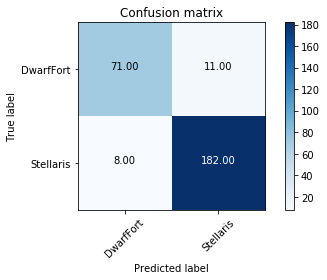

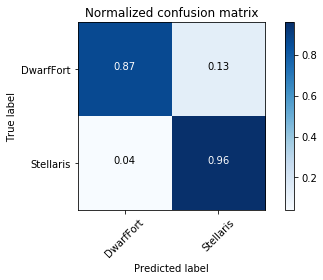

<Figure size 432x288 with 0 Axes>

In [33]:
# instance model
model = SGDClassifier()
# fit model
model.fit(X=X_train_tf, y=y_train)

performance(model, X_train_tf, X_test_tf)

## Model Examination

TFIDF vectorizer performed well, slight improvement over count vectorizer.  We'll examine where it failed, and investigate why it might have failed.  Possibly the mis-classified comments are not possible for a human to classify either, even with knowledge of the subject matter for each topic.

In [34]:
misclassified = np.where(y_test != model.predict(X_test_tf))
preds = model.predict(X_test_tf)

In [35]:
for x in misclassified:
    for y in x:
        s = slice(y,y+1)
        print('Post incorrectly predicted to be: ' + preds[y])
        print(X_test[s].values)
        print('')

Post incorrectly predicted to be: DwarfFort
['gaia:  *an ideal, temperate world with a nitrogen-oxygen atmosphere and a resilient ecosystem. optimal conditions for all known higher forms of life at different latitudes.* \r\n\r\ncontinental:  *rocky world with a nitrogen-oxygen atmosphere. active and stable hydrosphere. great landmasses are separated by oceans,* ***with large climate variations depending on latitude and precipitation.***\r\n\r\nthese seem pretty much identical to me since earth has all the climates we see in game except for nuclear winter.']

Post incorrectly predicted to be: DwarfFort
['&amp;#x200b;\r\n\r\nhttps://i.redd.it/fcy7l968ji421.png\r\n\r\n&amp;#x200b;\r\n\r\nhttps://i.redd.it/g18cf38aji421.png']

Post incorrectly predicted to be: DwarfFort
['for example if i want to have an empire centered around human refugees from earth living on an ocean world. humans can live there, but they\'d rather be on a continental world.\r\n\r\nan alternative could be a "refugee re

#### Reviewing Errors in detail

Phrases with errors will vary based on the selection of words from the API, and it will vary on the train/test split.  Using the initial CSV's provided with this project, we can review some errors and see why they didn't work.

Post incorrectly predicted to be: Stellaris<br>
["are there any dwarfy podcasts? don't have a ton of time to play these days but i'd love to tune in to something like a podcast. anyone got any recs?"]<br><br>
The word 'dwarfy' sounds like it should below with Dwarf Fortress, however it occurs only very rarely in the post selection (only 3 times).

In [51]:
[i for i, s in enumerate(words_freq) if 'dwarfy' in s]

[2006]

In [52]:
words_freq[2006:2007]

[('dwarfy', 3)]

Post incorrectly predicted to be: DwarfFort <br>
["the reason for this is simple: castor is a hexinary star system and it's really neat.\r\n\r\na and b orbit each other and that whole group is orbited by c but! all 3 sets are actually binaries with white dwarves.\r\n\r\nwould be a really fun system to have in there.\r\n\r\ni've not tried my hand at modding or i'd try to make it myself."]<br><br>
Based on the language of the post, it's easy to see why it would mis-classify it as Dwarf Fortress, even though write dwarf is a type of star.

## Conclusion

The best performing model was SGD classifier, using TFIDF vectorizer, with no n_gram features.  Training and testing accuracy were both 90%+, depending on the train/test sample, with a slight overfitting.

Reviewing the incorrectly predicted posts, most don't clearly stand out as easy for a human to predict even with previous knowledge of the two subreddits.  Further hyperparameter tunning is unlikely to gain much more accuracy based on these Reddit selections, default standard parameters worked well.  